In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from numpy import genfromtxt
train_data = genfromtxt('exoTrain.csv', skip_header=1, delimiter=',')
test_data = genfromtxt('exoTest.csv', skip_header=1, delimiter=',')

In [3]:
label_test = np.array([item[0] for item in test_data])
data_test = np.delete(test_data, [0], axis=1)
label_train = np.array([item[0] for item in train_data])
data_train = np.delete(train_data, [0], axis=1)
print(label_test)
print(data_test)
print(label_train.shape)
print(data_train.shape)

[2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [67]:
data_train = ((data_train - np.mean(data_train, axis=1).reshape(-1,1)) / 
           np.std(data_train, axis=1).reshape(-1,1))
data_test = ((data_test - np.mean(data_test, axis=1).reshape(-1,1)) / 
          np.std(data_test, axis=1).reshape(-1,1))

#label_train = np.array_split(label_train, 4)
#data_train = np.array_split(data_train, 4)

print(data_train[0])

#print(data_test)
#print(label_test.shape)
#print(data_test.shape)
#print(label_train.shape)
#print(data_train.shape)

[ 0.52205598  0.45958061  0.06313585 ...  0.32025558 -0.03032828
 -0.30798274]


In [72]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation=tf.nn.relu),
	tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
])


In [73]:
tf.keras.initializers.RandomUniform(minval=-500, maxval=500, seed=None)
model.compile(optimizer=(tf.keras.optimizers.Adagrad(lr=0.02, epsilon=None, decay=0.0)),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
history = model.fit(data_train, label_train, validation_split=0.1, batch_size=100, epochs=5)


Train on 4578 samples, validate on 509 samples
Epoch 1/5
4578/4578 [==============================] - 1s 244us/sample - loss: 0.1018 - acc: 0.9559 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 2/5
4578/4578 [==============================] - 1s 158us/sample - loss: -0.0572 - acc: 0.9914 - val_loss: 0.0027 - val_acc: 1.0000
Epoch 3/5
4578/4578 [==============================] - 1s 148us/sample - loss: -0.1219 - acc: 0.9919 - val_loss: 8.8929e-04 - val_acc: 1.0000
Epoch 4/5
4578/4578 [==============================] - 1s 141us/sample - loss: -0.2541 - acc: 0.9917 - val_loss: 4.2994e-04 - val_acc: 1.0000
Epoch 5/5
4578/4578 [==============================] - 1s 143us/sample - loss: -0.4705 - acc: 0.9919 - val_loss: 3.6988e-04 - val_acc: 1.0000


In [75]:
model.evaluate(data_test, label_test)

570/570 [==============================] - 0s 132us/sample - loss: -0.2504 - acc: 0.9912


[-0.25042755708788733, 0.99122804]

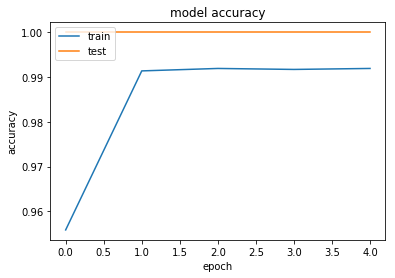

In [76]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

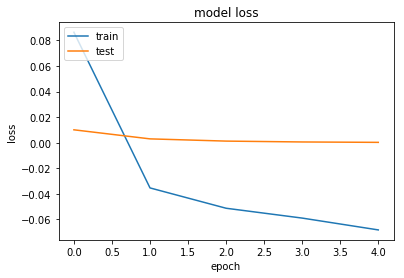

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(FLAGS.summaries_dir + '/train',
                                      sess.graph)
test_writer = tf.summary.FileWriter(FLAGS.summaries_dir + '/test')
tf.global_variables_initializer().run()